In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import yfinance as yf
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx")
df

"                      created_at  favorite_count  \
0    1815129496498118707  Sun Jul 21 20:59:30 +0000 2024            2659   
1    1815087772216303933  Sun Jul 21 18:19:22 +0000 2024            1257   
2    1815080881981190320  Sun Jul 21 18:02:54 +0000 2024            2148   
3    1806558622450651160  Fri Jun 28 05:21:54 +0000 2024            2201   
4    1806558458457567533  Fri Jun 28 05:21:15 +0000 2024            3113   
..                   ...                             ...             ...   
114  1744855460224905299  Tue Jan 09 22:55:34 +0000 2024            1406   
115  1742521254668603464  Wed Jan 03 17:26:45 +0000 2024             281   
116  1741731352599241211  Tue Jan 02 00:06:49 +0000 2024             374   
117  1741973894733639890  Tue Jan 02 00:05:15 +0000 2024            2552   
118  1741731150807314720  Mon Jan 01 08:00:40 +0000 2024            2688   

                                             full_text               id_str  \
0    be immune to the psyops $PEPE https://t.co/8eX...  1815129496498118707   
1              @JoeBiden be fr https://t.co/qmmUn7Bg1K  1815089197457314099   
2                    @JoeBiden https://t.co/PZkhg3gaMu  1815085057289412915   
3    watching the US presidential debates like $PEP...  1806558622450651160   
4                              https://t.co/Co2dOYSU5J  1806558458457567533   
..                                                 ...                  ...   
114                            https://t.co/obKnX3ThD5  1744855460224905299   
115                @TheBlock__ https://t.co/dyj17LU10p  1742598384488415700   
116  @binance My New Year's Eve was a movie. https:...  1741974290415923624   
117   Year of the Dragon $PEPE https://t.co/0kjt7EStXO  1741973894733639890   
118  Happy New Year frogs. May 2024 be a year fille...  1741731150807314720   

                                           image_url in_reply_to_screen_name  \
0    https://pbs.twimg.com/media/GTCipvJXcAAjINm.jpg                     NaN   
1    https://pbs.twimg.com/media/GTB-AMHWgAARBQf.jpg                JoeBiden   
2    https://pbs.twimg.com/media/GTB6PHPWcAAmDWt.jpg                JoeBiden   
3    https://pbs.twimg.com/media/GRIvfQjXYAEDVXn.jpg                     NaN   
4    https://pbs.twimg.com/media/GRIvVz1XgAAWO3f.jpg                     NaN   
..                                               ...                     ...   
114  https://pbs.twimg.com/media/GDb4ywgaYAAJywa.jpg                     NaN   
115  https://pbs.twimg.com/media/GC7z_o_aAAMVYz_.jpg              TheBlock__   
116  https://pbs.twimg.com/media/GCy8Yn4aIAApfC4.jpg                 binance   
117  https://pbs.twimg.com/media/GCy8BmiaUAAZEMI.jpg                     NaN   
118  https://pbs.twimg.com/media/GCvfP-XbQAACWTM.jpg                     NaN   

    lang     location  quote_count  reply_count  retweet_count  \
0     en  Eth, France           31          405            565   
1     en  Eth, France            0          137            246   
2    qme  Eth, France           10          111            277   
3     en  Eth, France           18          367            455   
4    zxx  Eth, France           16          240            619   
..   ...          ...          ...          ...            ...   
114  zxx  Eth, France           13          302            291   
115  qme  Eth, France            3           20             42   
116   en  Eth, France            3           24             59   
117   en  Eth, France           44          376            525   
118   en  Eth, France           24          318            553   

                                             tweet_url          user_id_str  \
0    https://x.com/pepecoineth/status/1815129496498...  1643286556730351616   
1    https://x.com/pepecoineth/status/1815089197457...  1643286556730351616   
2    https://x.com/pepecoineth/status/1815085057289...  1643286556730351616   
3    https://x.com/pepecoineth/status/1806558622450...  1643286556730351616   
4    https:/

In [3]:
df.columns

Index(['"', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url',
       'in_reply_to_screen_name', 'lang', 'location', 'quote_count',
       'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username'],
      dtype='object')

# **Memecoin Twitter Account Insight**

**Simple Data Analysis (quote, reply, retweet)**

In [4]:
sheet_names = ['Pepe', 'Wif', 'Floki', 'Bonk', 'Ponke', 'MAGA', 'Apu']

# Dictionary to store the average (mean) results
mean_results = {}

# Dictionary to store the max results
max_results = {}

# Loop to read each sheet and calculate the means and maximums
for sheet in sheet_names:
    # Read the sheet from the Excel file
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Calculate the average (mean) for 'quote_count', 'reply_count', and 'retweet_count'
    avg_quote = df['quote_count'].mean()
    avg_reply = df['reply_count'].mean()
    avg_retweet = df['retweet_count'].mean()

    # Calculate the max for 'quote_count', 'reply_count', and 'retweet_count'
    max_quote = df['quote_count'].max()
    max_reply = df['reply_count'].max()
    max_retweet = df['retweet_count'].max()

    # Store the mean results in the dictionary
    mean_results[sheet] = {
        'average_quote_count': avg_quote,
        'average_reply_count': avg_reply,
        'average_retweet_count': avg_retweet
    }

    # Store the max results in the dictionary
    max_results[sheet] = {
        'max_quote_count': max_quote,
        'max_reply_count': max_reply,
        'max_retweet_count': max_retweet
    }

# Print the mean results for each sheet
print("Average (Mean) Results:")
for sheet, averages in mean_results.items():
    print(f"Sheet: {sheet}")
    print(f"Average Quote Count: {averages['average_quote_count']}")
    print(f"Average Reply Count: {averages['average_reply_count']}")
    print(f"Average Retweet Count: {averages['average_retweet_count']}")
    print("-" * 30)

# Print the max results for each sheet
print("Max Results:")
for sheet, maximums in max_results.items():
    print(f"Sheet: {sheet}")
    print(f"Max Quote Count: {maximums['max_quote_count']}")
    print(f"Max Reply Count: {maximums['max_reply_count']}")
    print(f"Max Retweet Count: {maximums['max_retweet_count']}")
    print("-" * 30)

Average (Mean) Results:
Sheet: Pepe
Average Quote Count: 27.243697478991596
Average Reply Count: 361.89915966386553
Average Retweet Count: 458.0504201680672
------------------------------
Sheet: Wif
Average Quote Count: 4.934362934362935
Average Reply Count: 39.16216216216216
Average Retweet Count: 51.826254826254825
------------------------------
Sheet: Floki
Average Quote Count: 13.125730994152047
Average Reply Count: 64.95175438596492
Average Retweet Count: 203.72076023391813
------------------------------
Sheet: Bonk
Average Quote Count: 6.076477404403245
Average Reply Count: 120.41483198146003
Average Retweet Count: 89.720741599073
------------------------------
Sheet: Ponke
Average Quote Count: 3.623134328358209
Average Reply Count: 84.75093283582089
Average Retweet Count: 104.86194029850746
------------------------------
Sheet: MAGA
Average Quote Count: 5.456666666666667
Average Reply Count: 42.43333333333333
Average Retweet Count: 66.96666666666667
-----------------------------

**Correlation Matrics**

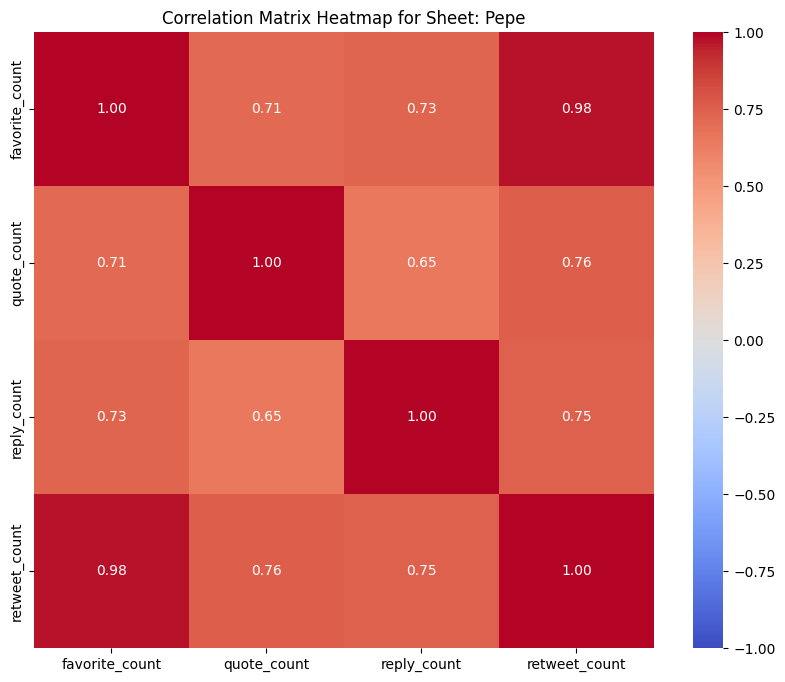

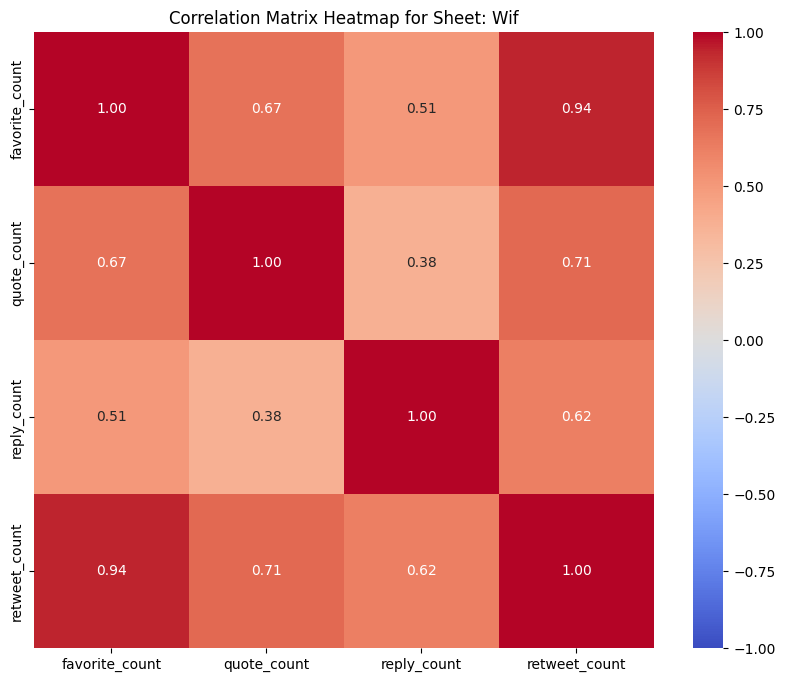

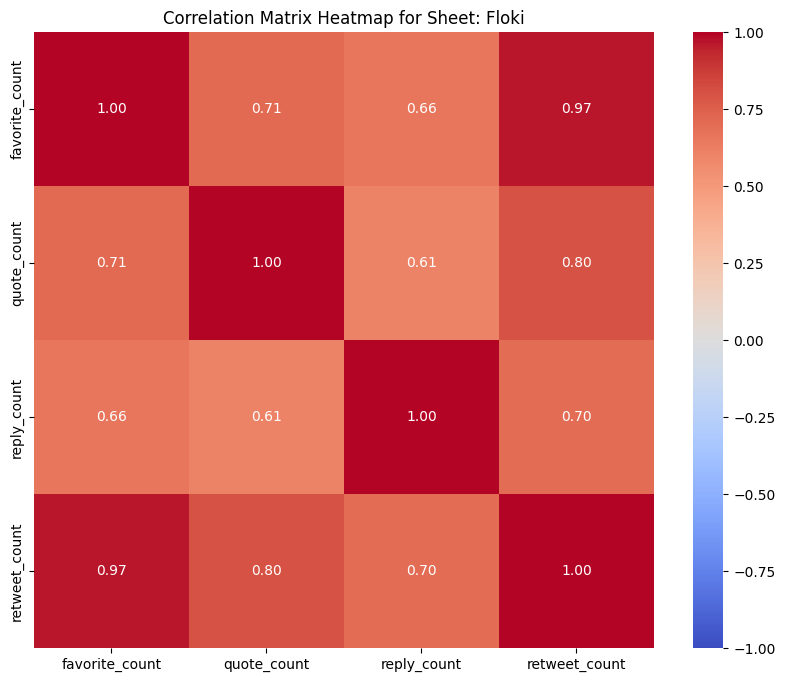

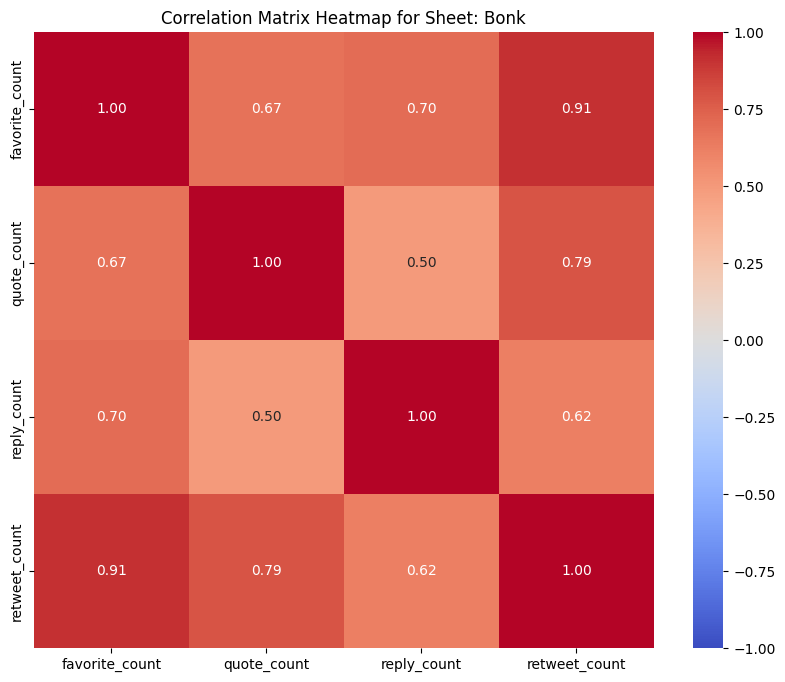

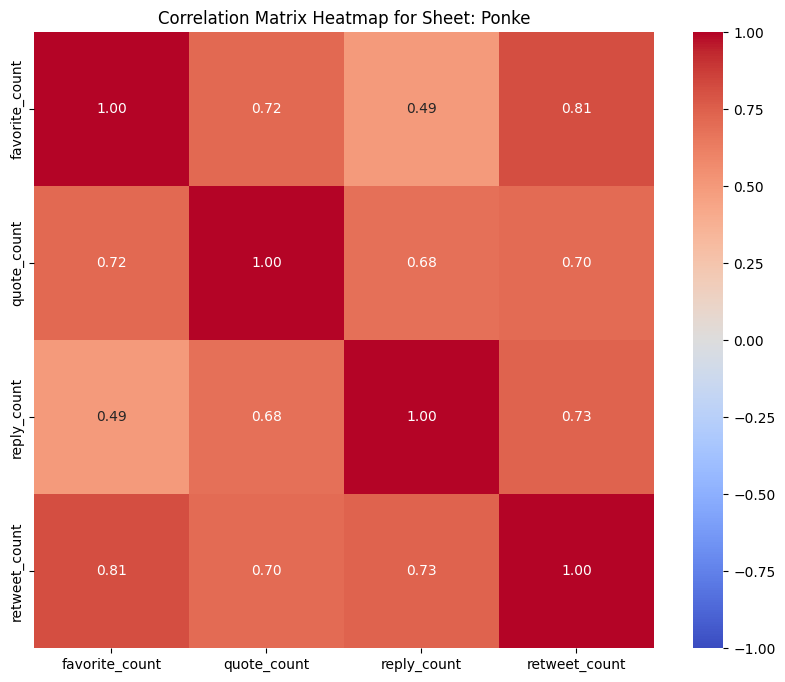

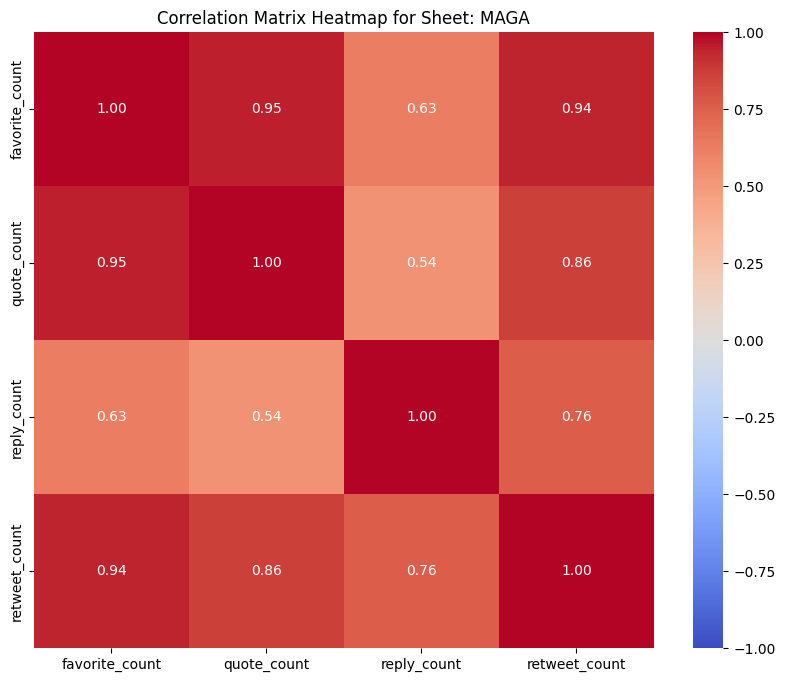

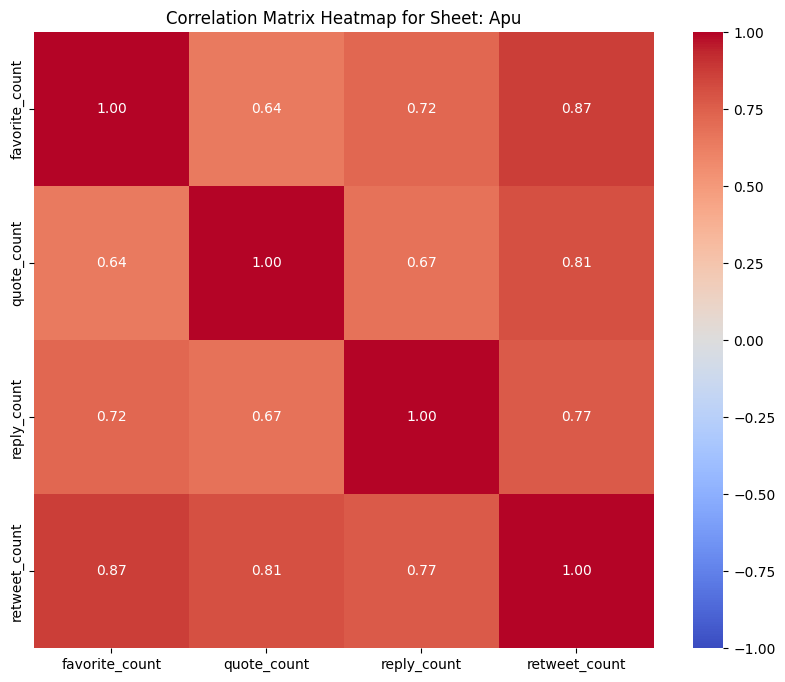

In [5]:
# Path to the Excel file
sheet_names = ['Pepe', 'Wif', 'Floki', 'Bonk', 'Ponke', 'MAGA', 'Apu']

# Loop to read each sheet and create heatmaps
for sheet in sheet_names:
    # Read the sheet from the Excel file
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Select only numerical columns
    numerical_columns = ['favorite_count', 'quote_count', 'reply_count', 'retweet_count']
    df_numerical = df[numerical_columns]

    # Calculate the correlation matrix
    correlation_matrix = df_numerical.corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix Heatmap for Sheet: {sheet}')

    # Show the heatmap
    plt.show()

**Impact of Image Presence on Engagement Metrics**

In [6]:
import pandas as pd
sheet_names = [
    'Pepe', 'Wif', 'Floki', 'Bonk', 'Ponke', 'MAGA', 'Apu'
]
# Initialize a dictionary to store the results
results = {}

for sheet in sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Count the total number of tweets
    total_tweets = df.shape[0]

    # Count the number of tweets with images and without images
    with_image_count = df['image_url'].notna().sum()
    without_image_count = df['image_url'].isna().sum()

    # Calculate percentages
    with_image_percentage = (with_image_count / total_tweets) * 100 if total_tweets > 0 else 0
    without_image_percentage = (without_image_count / total_tweets) * 100 if total_tweets > 0 else 0

    # Store the results in the dictionary
    results[sheet] = {
        'Total Tweets': total_tweets,
        'Tweets with Image': with_image_count,
        'Tweets without Image': without_image_count,
        'Percentage with Image': with_image_percentage,
        'Percentage without Image': without_image_percentage
    }

# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

       Total Tweets  Tweets with Image  Tweets without Image  \
Pepe          119.0              107.0                  12.0   
Wif           259.0              234.0                  25.0   
Floki         684.0              439.0                 245.0   
Bonk          863.0              323.0                 540.0   
Ponke        1072.0              829.0                 243.0   
MAGA          300.0              225.0                  75.0   
Apu           420.0              375.0                  45.0   

       Percentage with Image  Percentage without Image  
Pepe               89.915966                 10.084034  
Wif                90.347490                  9.652510  
Floki              64.181287                 35.818713  
Bonk               37.427578                 62.572422  
Ponke              77.332090                 22.667910  
MAGA               75.000000                 25.000000  
Apu                89.285714                 10.714286  


<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


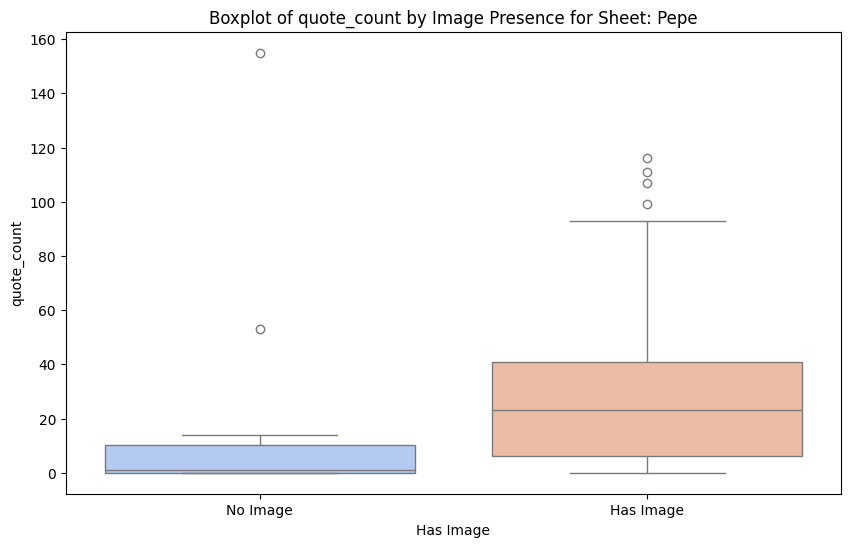

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


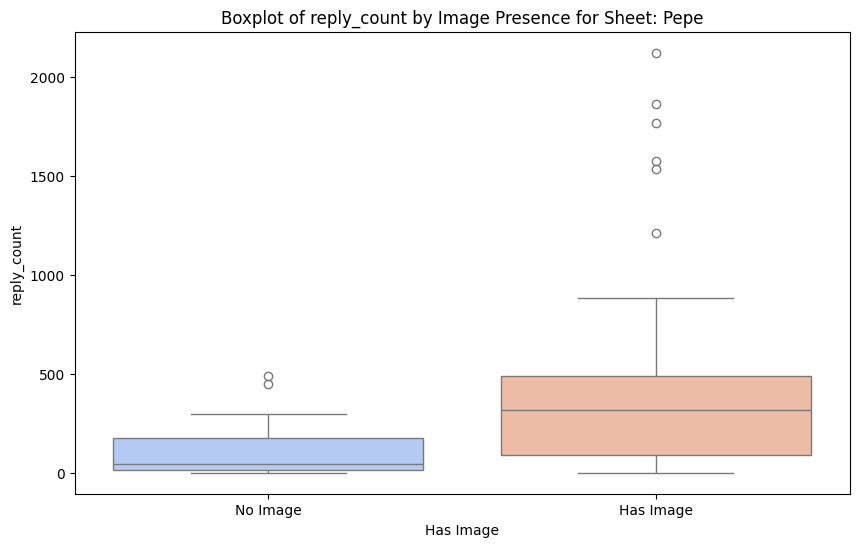

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


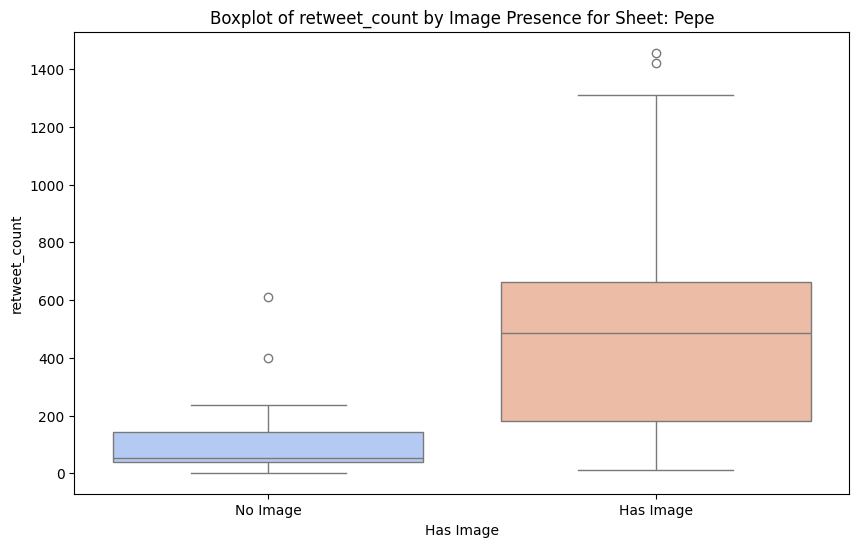

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


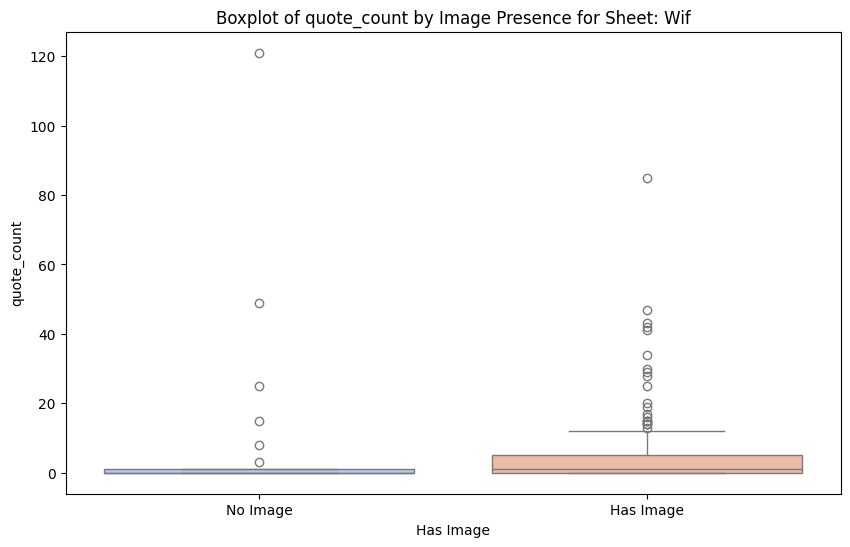

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


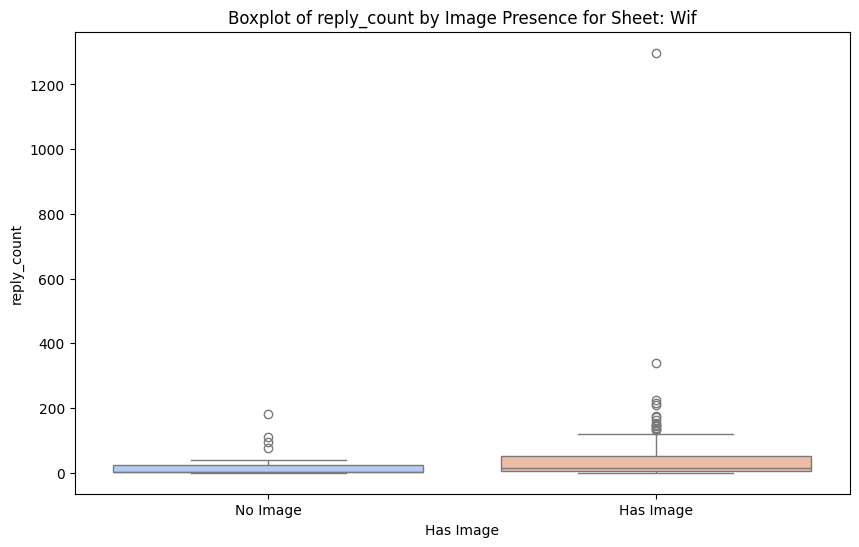

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


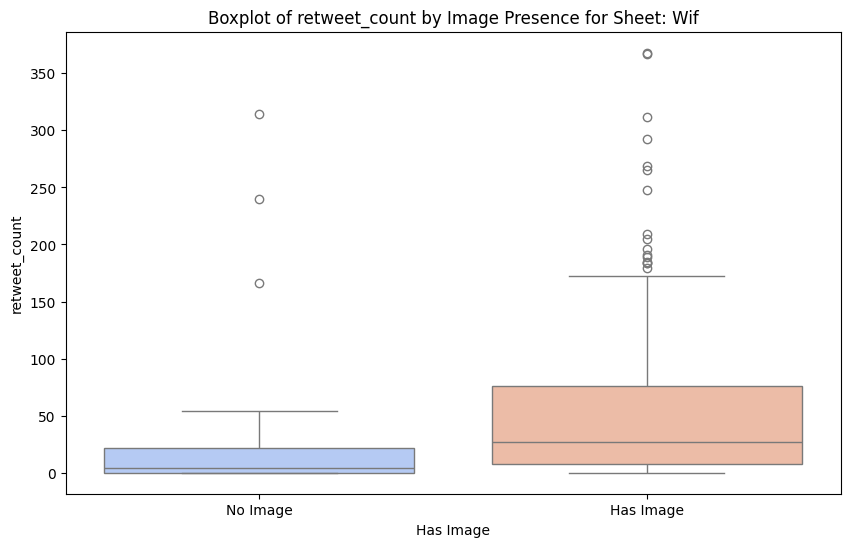

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


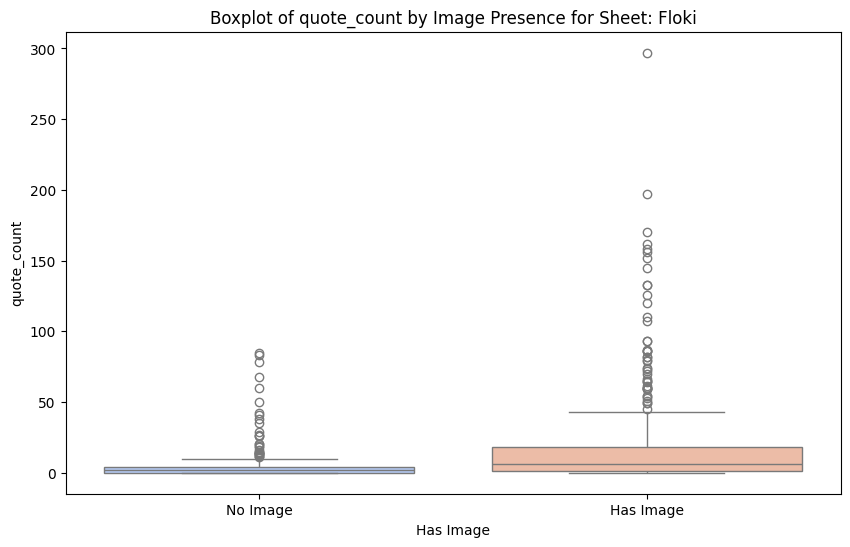

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


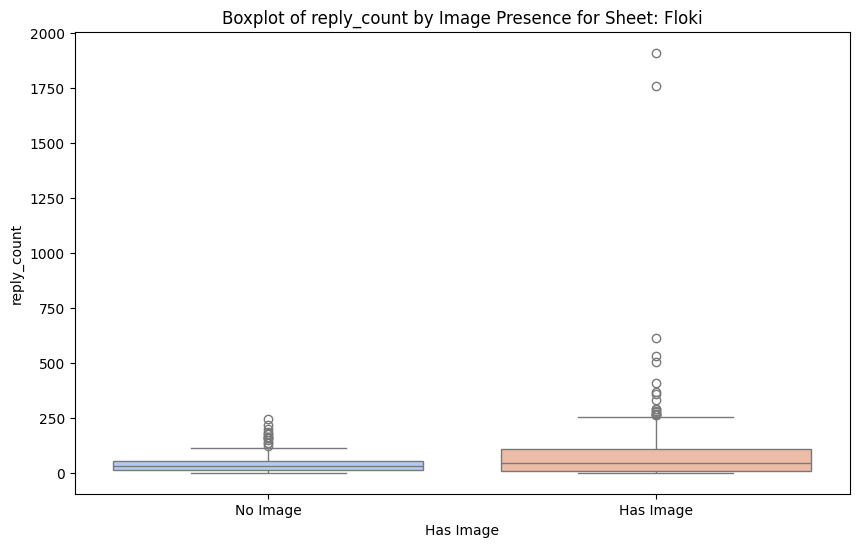

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


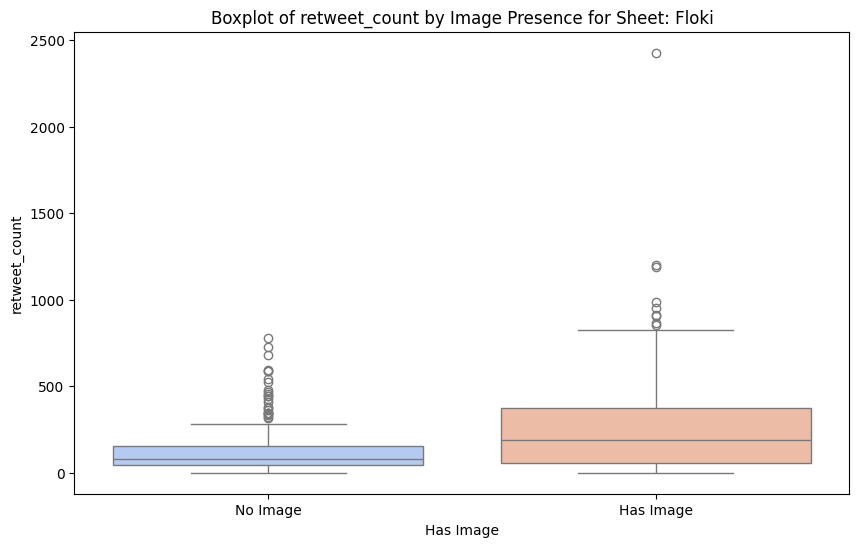

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


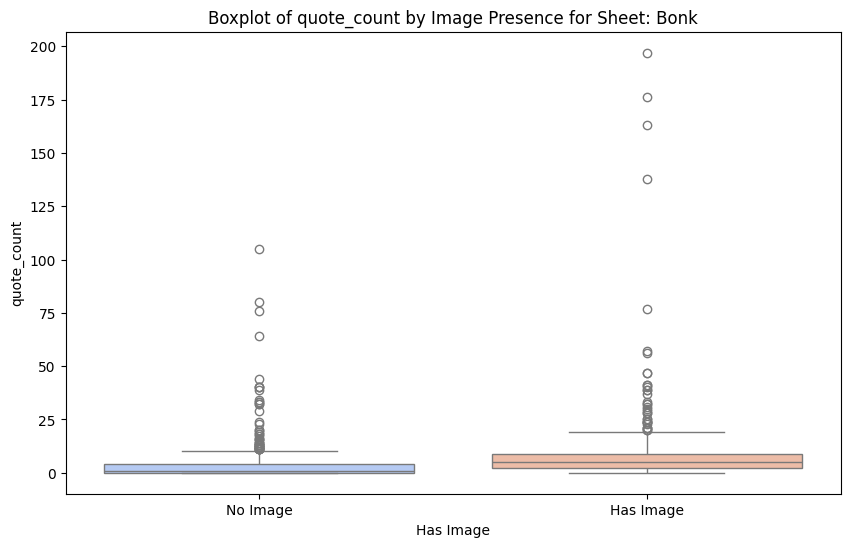

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


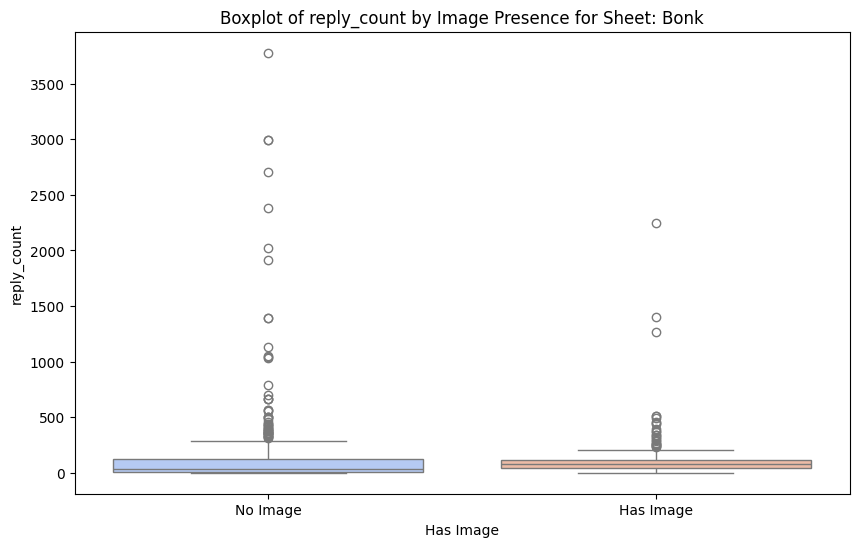

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


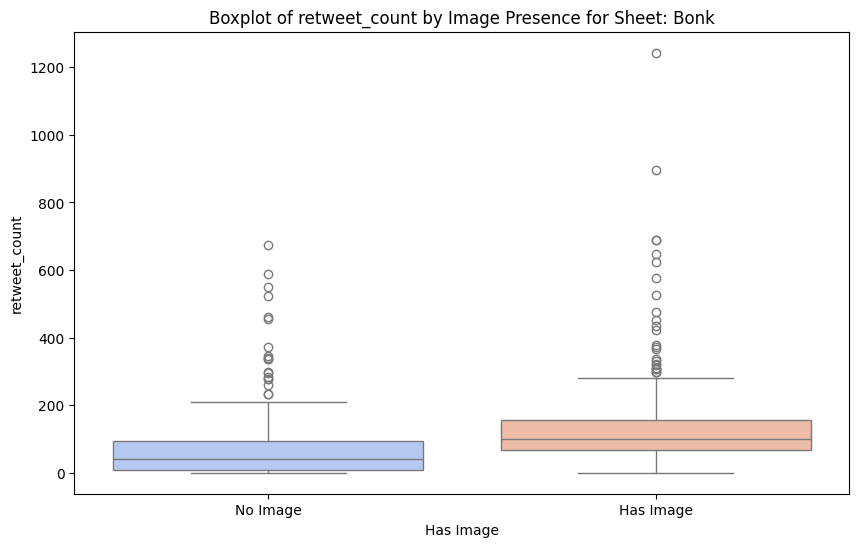

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


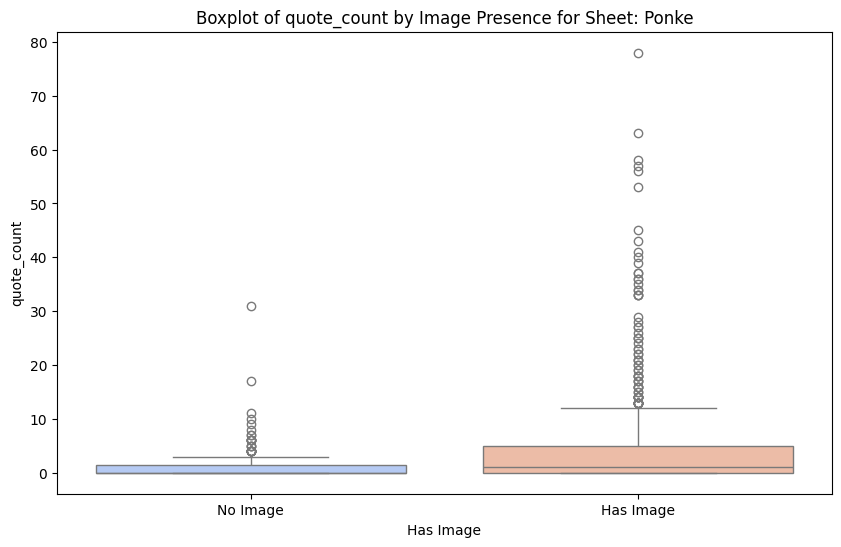

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


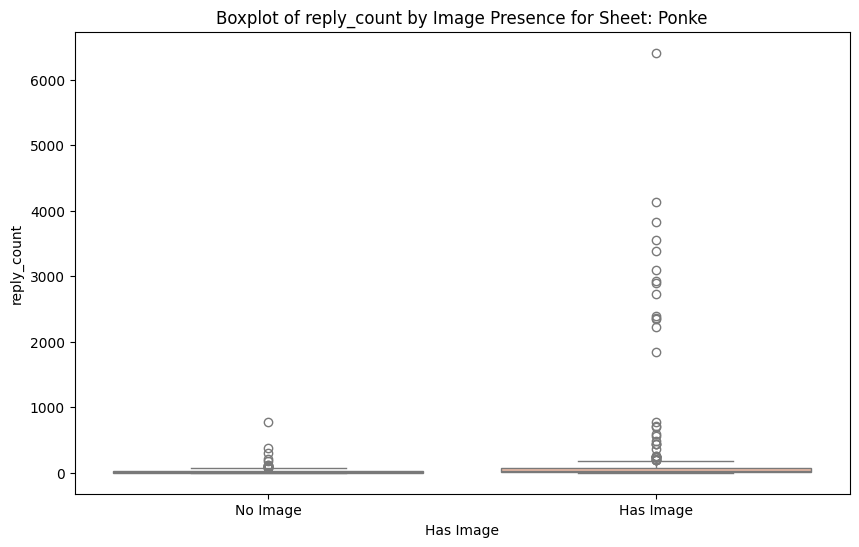

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


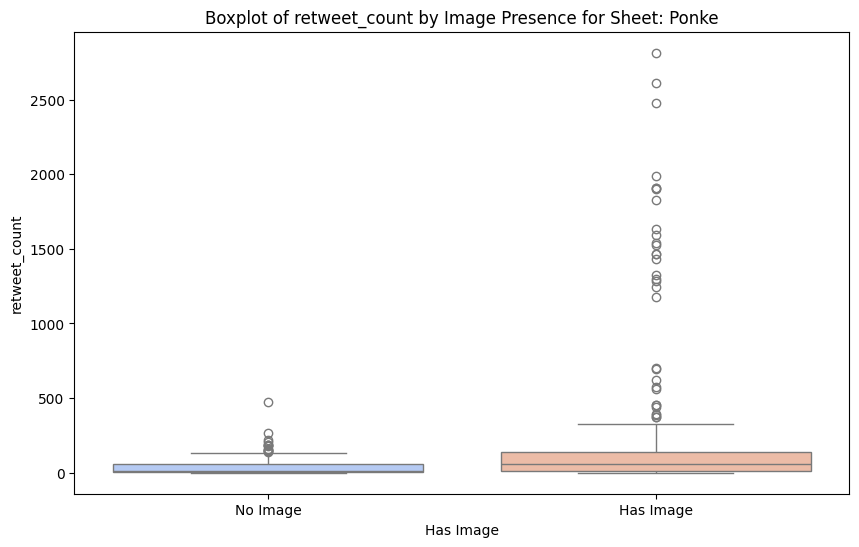

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


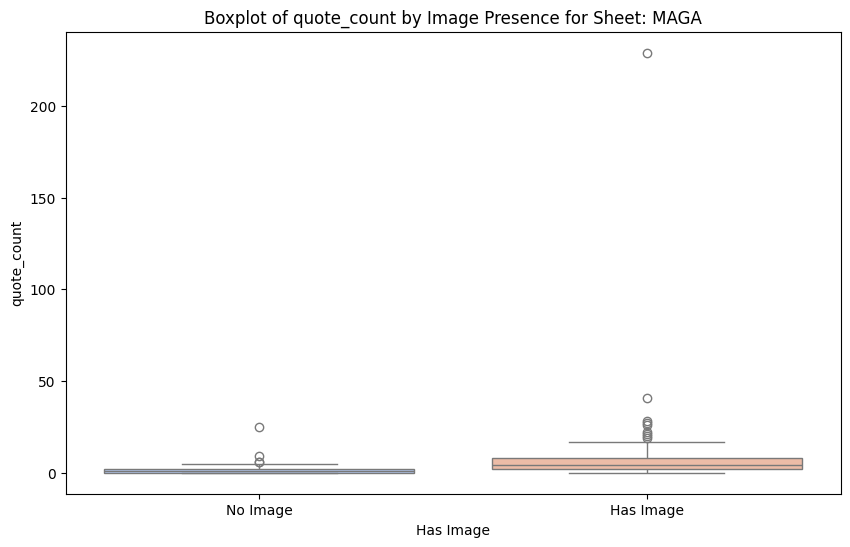

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


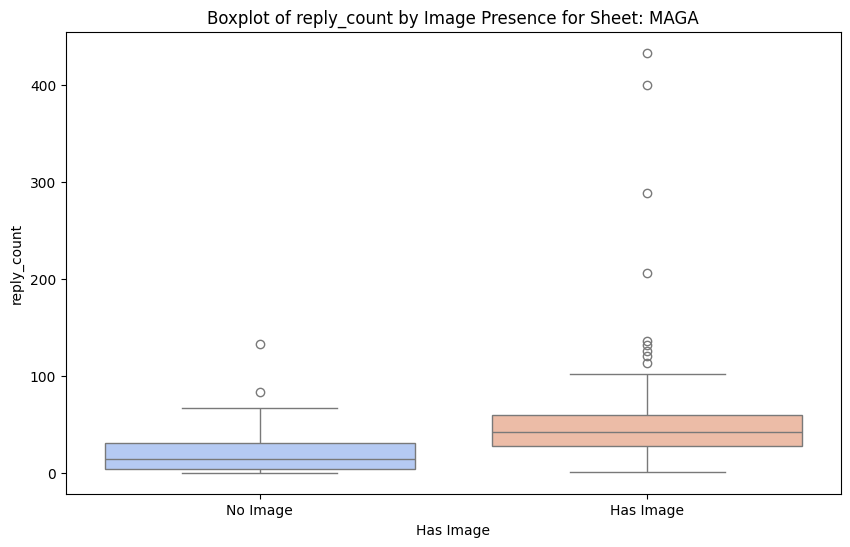

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


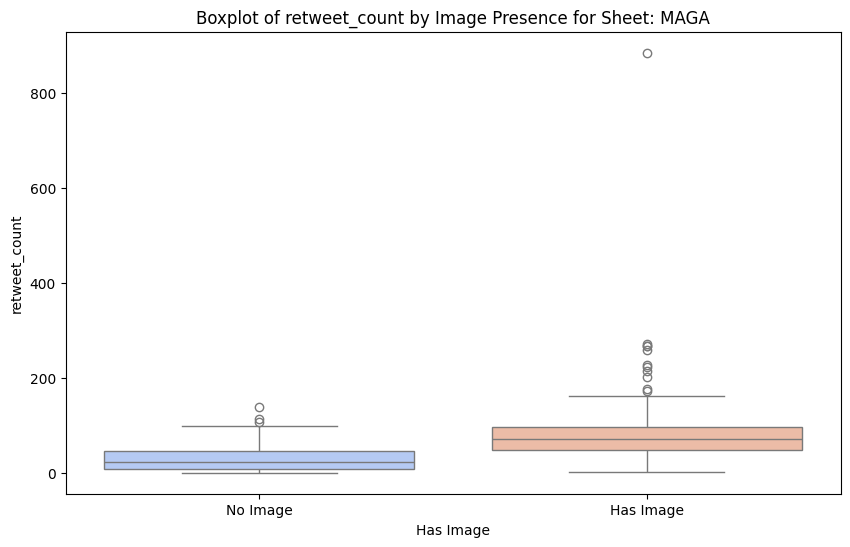

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


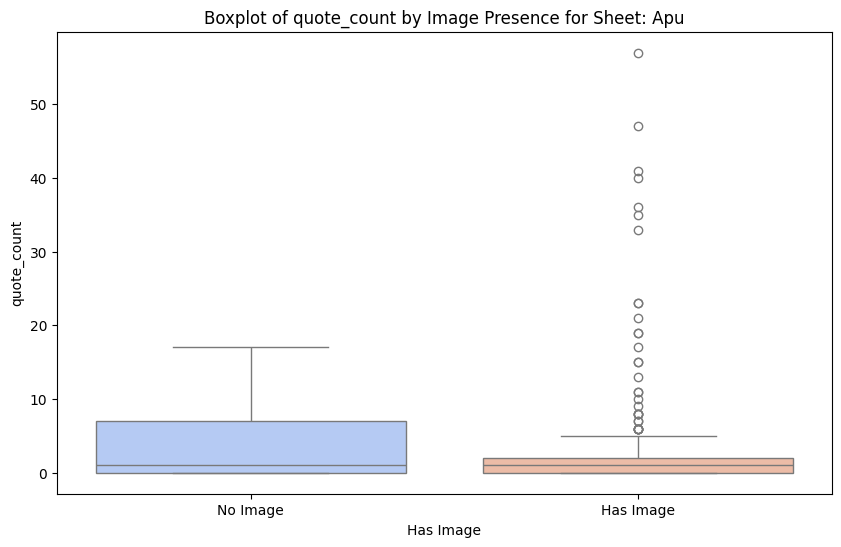

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


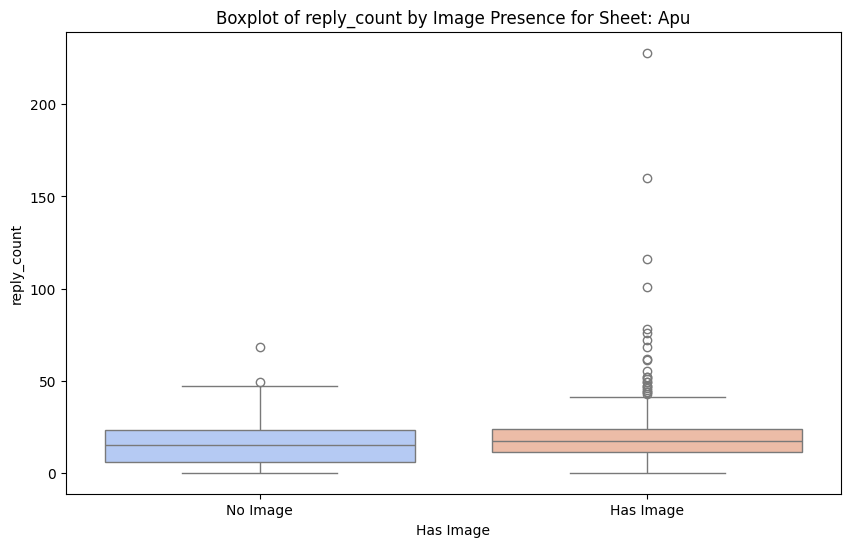

<ipython-input-7-bf8b53cbd2d9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')


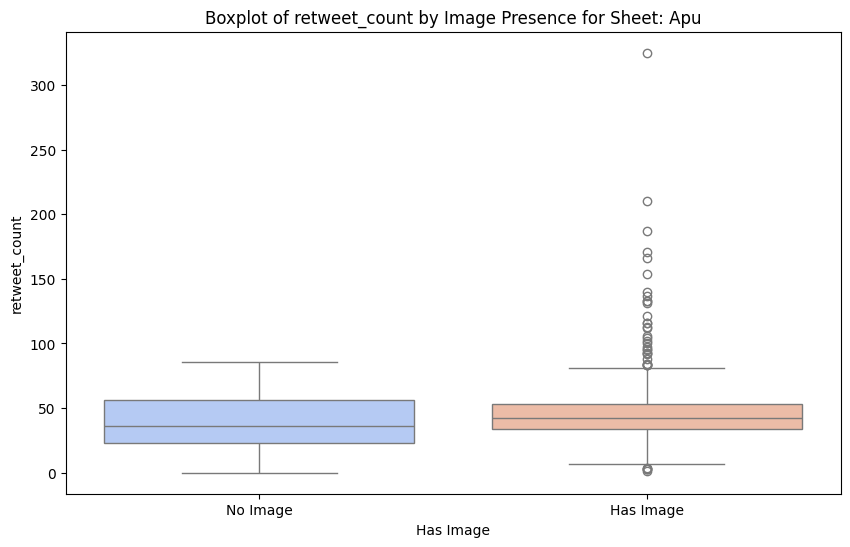

In [7]:
# Path to the Excel file
sheet_names = ['Pepe', 'Wif', 'Floki', 'Bonk', 'Ponke', 'MAGA', 'Apu']

# Loop to read each sheet and create boxplots
for sheet in sheet_names:
    # Read the sheet from the Excel file
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Create a new column to indicate whether there is an image
    df['has_image'] = df['image_url'].notna()

    # Define the columns for analysis
    metrics = ['quote_count', 'reply_count', 'retweet_count']

    for metric in metrics:
        # Create a boxplot for each metric
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='has_image', y=metric, data=df, palette='coolwarm')
        plt.title(f'Boxplot of {metric} by Image Presence for Sheet: {sheet}')
        plt.xlabel('Has Image')
        plt.ylabel(metric)
        plt.xticks([0, 1], ['No Image', 'Has Image'])

        # Show the plot
        plt.show()

In [8]:
# T-test
sheet_names = ['Pepe', 'Wif', 'Floki', 'Bonk', 'Ponke', 'MAGA', 'Apu']

# Define the metrics for which to perform the t-tests
metrics = ['quote_count', 'reply_count', 'retweet_count']

# Loop to read each sheet and perform t-tests
for sheet in sheet_names:
    # Read the sheet from the Excel file
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Create a new column to indicate whether there is an image
    df['has_image'] = df['image_url'].notna()

    print(f"Results for Sheet: {sheet}")

    for metric in metrics:
        # Split the data into two groups based on the presence of images
        group_with_image = df[df['has_image']][metric].dropna()
        group_without_image = df[~df['has_image']][metric].dropna()

        # Perform the t-test
        t_stat, p_value = ttest_ind(group_with_image, group_without_image, equal_var=False)  # Welch's t-test

        # Print the results
        print(f"\nMetric: {metric}")
        print(f"T-Statistic: {t_stat:.3f}")
        print(f"P-Value: {p_value:.3f}")

        # Interpretation
        if p_value < 0.05:
            print("There is a significant difference between tweets with and without images.")
        else:
            print("There is no significant difference between tweets with and without images.")

    print("\n" + "="*40 + "\n")  # Separator between sheets

Results for Sheet: Pepe

Metric: quote_count
T-Statistic: 0.639
P-Value: 0.535
There is no significant difference between tweets with and without images.

Metric: reply_count
T-Statistic: 3.935
P-Value: 0.001
There is a significant difference between tweets with and without images.

Metric: retweet_count
T-Statistic: 5.540
P-Value: 0.000
There is a significant difference between tweets with and without images.


Results for Sheet: Wif

Metric: quote_count
T-Statistic: -0.858
P-Value: 0.399
There is no significant difference between tweets with and without images.

Metric: reply_count
T-Statistic: 1.554
P-Value: 0.126
There is no significant difference between tweets with and without images.

Metric: retweet_count
T-Statistic: 0.981
P-Value: 0.335
There is no significant difference between tweets with and without images.


Results for Sheet: Floki

Metric: quote_count
T-Statistic: 6.958
P-Value: 0.000
There is a significant difference between tweets with and without images.

Metric: rep

**Correlation Analysis Between Cryptocurrency Closing Prices and Engagement Metrics**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


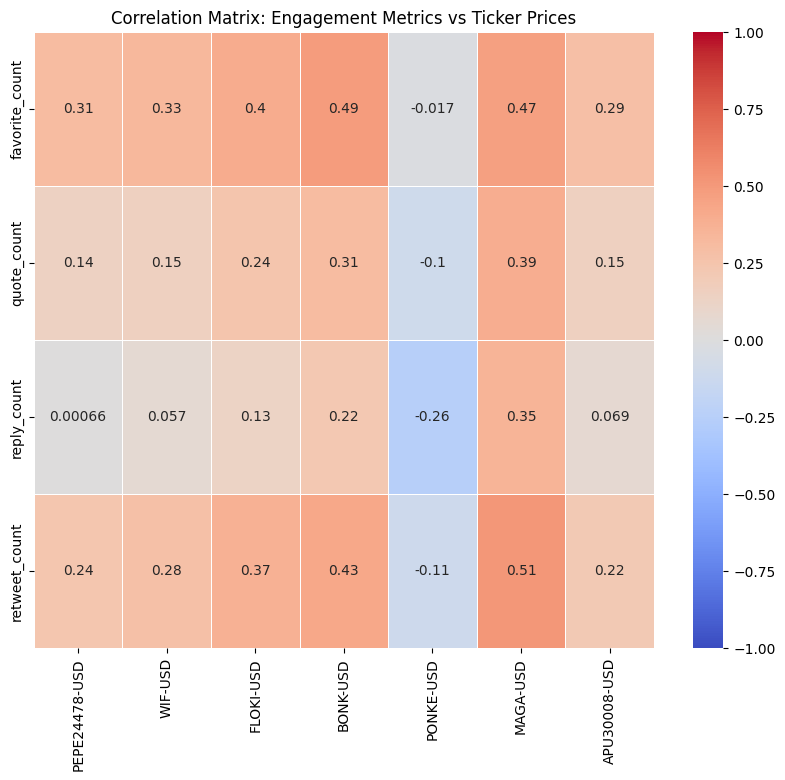

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

# Define the tickers and date range
tickers = [
    'PEPE24478-USD', 'WIF-USD', 'FLOKI-USD', 'BONK-USD',
    'PONKE-USD', 'MAGA-USD', 'APU30008-USD'
]
start_date = '2024-01-01'
end_date = '2024-08-24'

# Download closing prices for the tickers
price_data = {}
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    price_data[ticker] = data['Close']

# Convert price_data to a DataFrame
price_df = pd.DataFrame(price_data)
price_df.index.name = 'Date'

# Read engagement metrics from the Excel file
sheet_names = ['Pepe', 'Wif', 'Floki', 'Bonk', 'Ponke', 'MAGA', 'Apu']

# Aggregate engagement metrics by date
engagement_data = []
for sheet in sheet_names:
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)
    df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')
    df['date'] = df['created_at'].dt.date

    df_aggregated = df.groupby('date').agg({
        'favorite_count': 'sum',
        'quote_count': 'sum',
        'reply_count': 'sum',
        'retweet_count': 'sum'
    }).reset_index()

    engagement_data.append(df_aggregated)

# Combine all engagement data into one DataFrame
engagement_df = pd.concat(engagement_data)
engagement_df['date'] = pd.to_datetime(engagement_df['date'])
engagement_df = engagement_df.groupby('date').agg({
    'favorite_count': 'sum',
    'quote_count': 'sum',
    'reply_count': 'sum',
    'retweet_count': 'sum'
}).reset_index()

# Merge engagement data with price data
merged_df = pd.merge(engagement_df, price_df, left_on='date', right_index=True)

# Calculate correlations and create a correlation matrix
correlation_matrix = pd.DataFrame()

metrics = ['favorite_count', 'quote_count', 'reply_count', 'retweet_count']
for metric in metrics:
    for ticker in tickers:
        correlation = merged_df[metric].corr(merged_df[ticker])
        correlation_matrix.loc[metric, ticker] = correlation

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix: Engagement Metrics vs Ticker Prices')
plt.show()

**WordCloud**

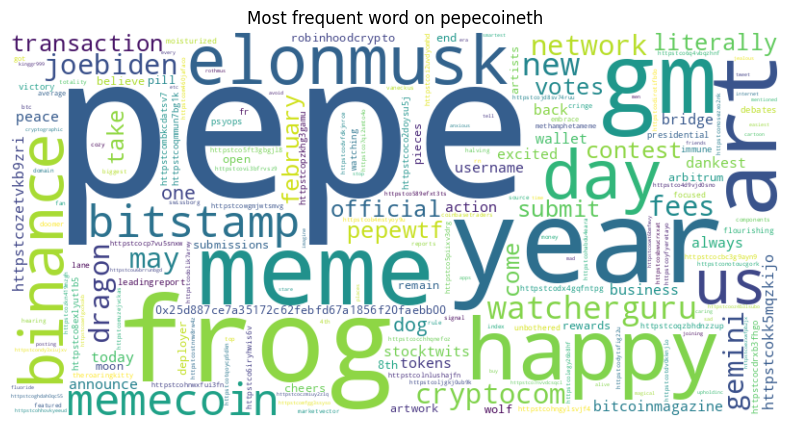

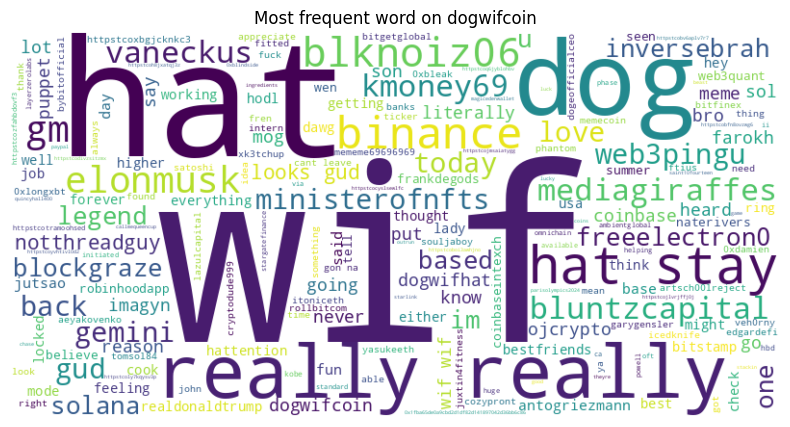

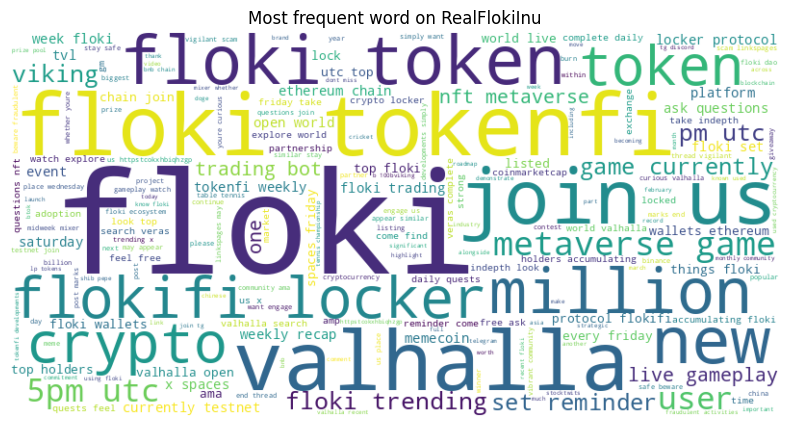

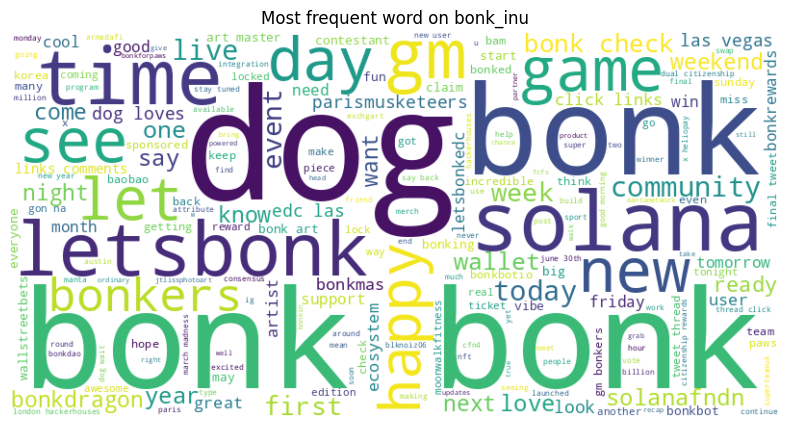

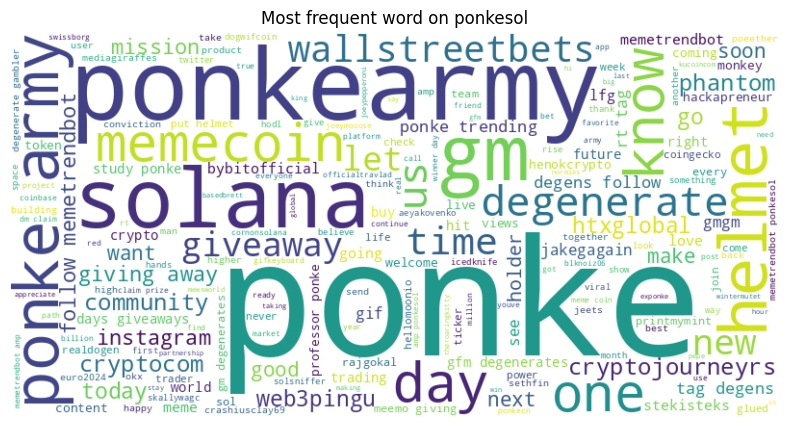

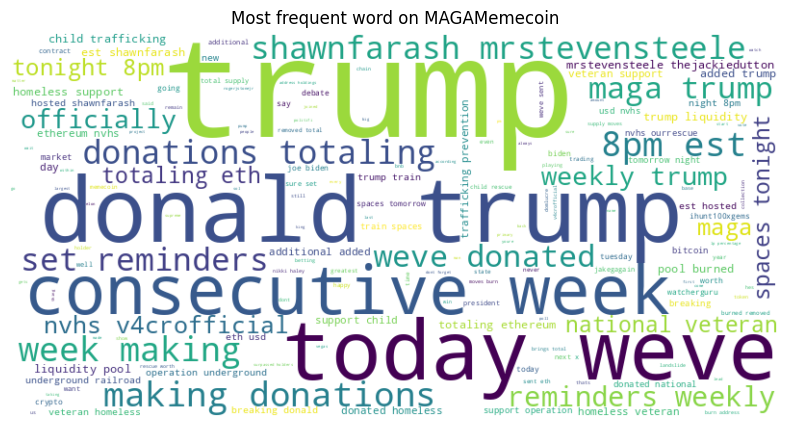

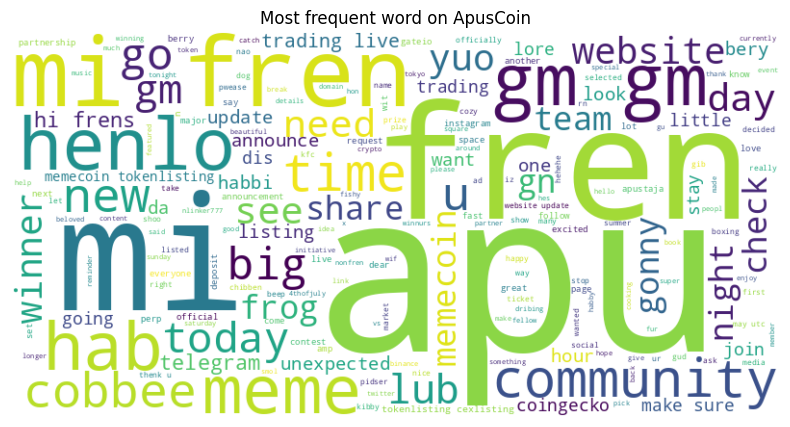

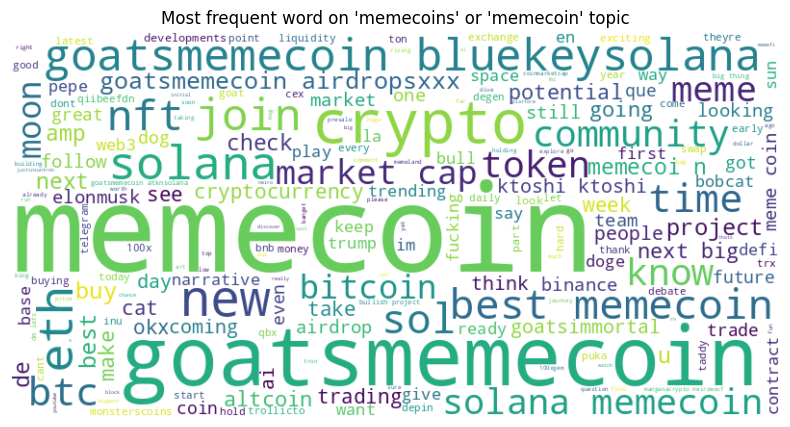

In [10]:
# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):  # Only process if the input is a string
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize text
        words = word_tokenize(text)

        # Convert to lowercase
        words = [word.lower() for word in words]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        # Join words back into a single string
        cleaned_text = ' '.join(words)
        return cleaned_text
    else:
        return ''  # Return empty string for non-string values (e.g., NaN)

# Define a function to generate WordCloud
def generate_wordcloud(sheet_name, full_text_column, title):
    # Clean the full_text column
    full_text_column = full_text_column.apply(clean_text)

    # Join all cleaned text for the WordCloud
    all_text = ' '.join(full_text_column)

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.title(title)
    plt.show()

# Load your Excel file
sheet_names = ["Pepe", "Wif", "Floki", "Bonk", "Ponke", "MAGA", "Apu","WordCloud"]
titles = {
    "Pepe": "Most frequent word on pepecoineth",
    "Wif": "Most frequent word on dogwifcoin",
    "Floki": "Most frequent word on RealFlokiInu",
    "Bonk": "Most frequent word on bonk_inu",
    "Ponke": "Most frequent word on ponkesol",
    "MAGA": "Most frequent word on MAGAMemecoin",
    "Apu": "Most frequent word on ApusCoin",
    "WordCloud" : "Most frequent word on 'memecoins' or 'memecoin' topic"
}

# Loop through each sheet and generate WordCloud with the appropriate title
for sheet in sheet_names:
    # Read each sheet into a DataFrame
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Generate WordCloud for the full_text column with the corresponding title
    generate_wordcloud(sheet, df['full_text'], titles[sheet])

# **Sentiment Analysis on these few keyword : #PEPE, #WIF, #FLOKI, #BONK, #PONKE, #MAGA, #APU**

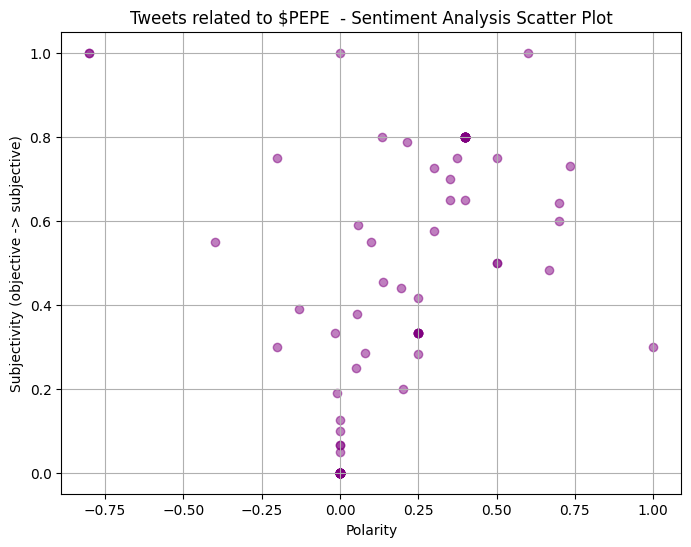

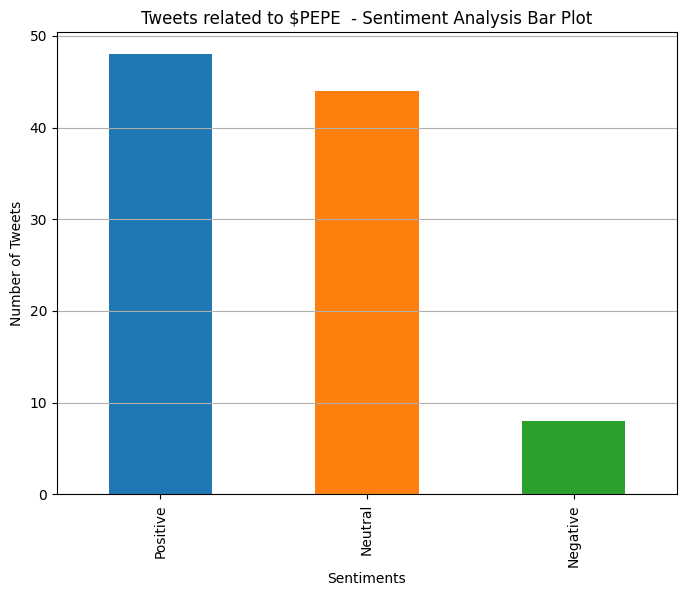

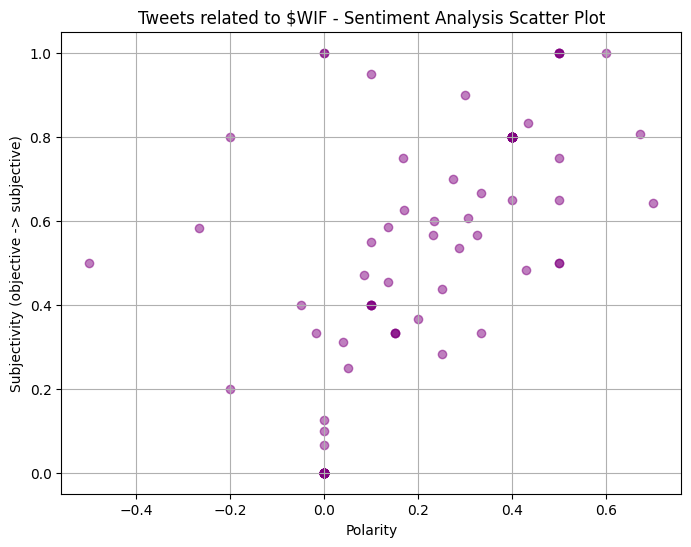

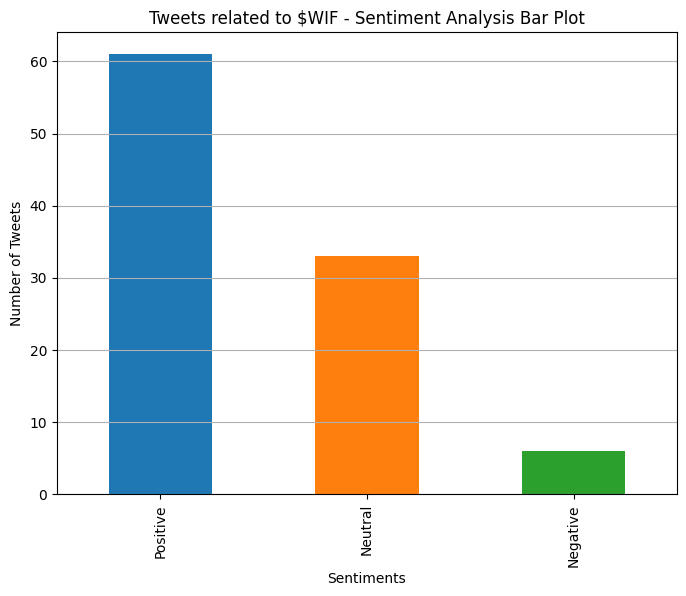

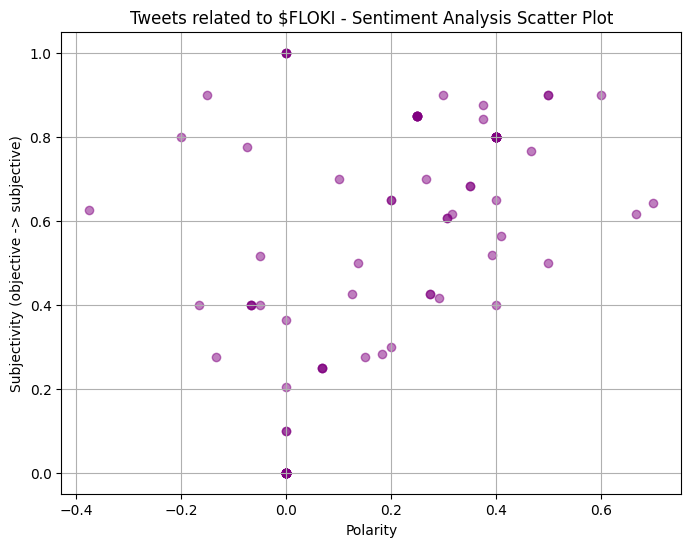

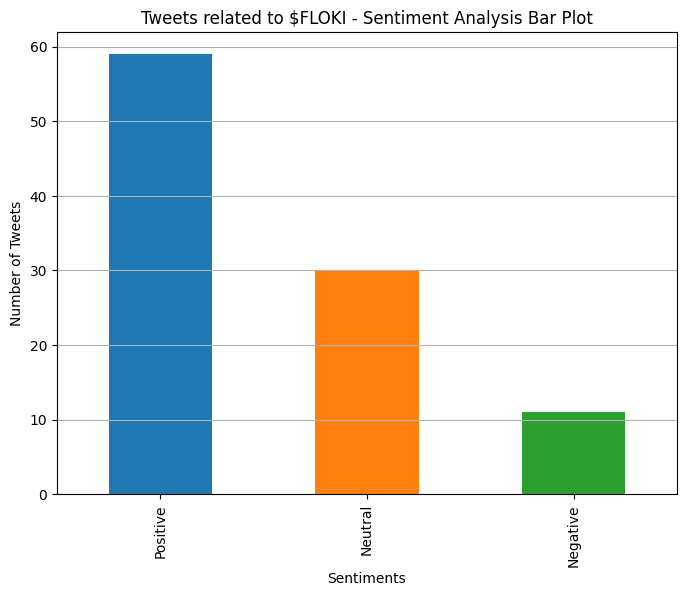

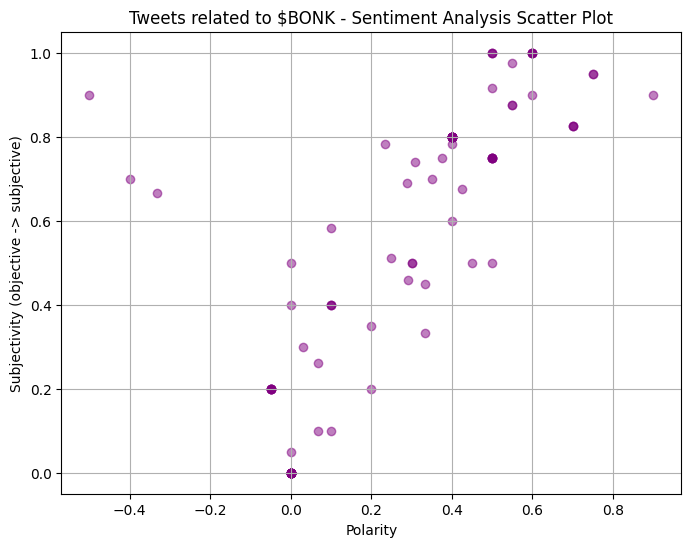

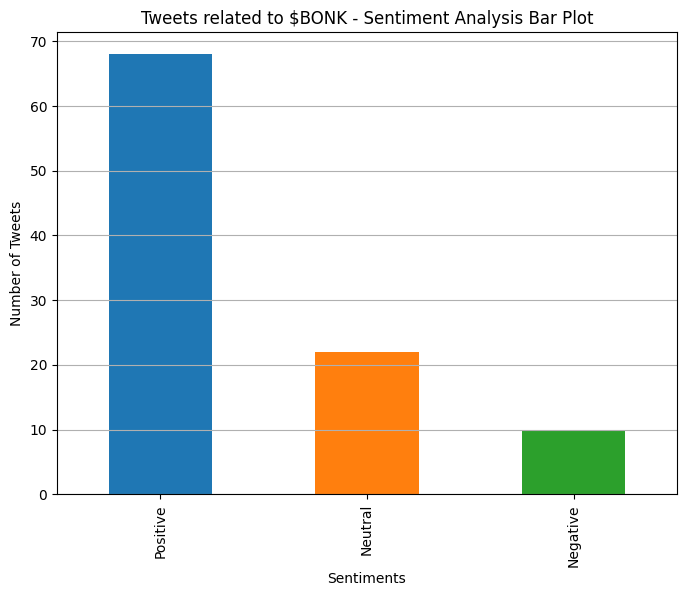

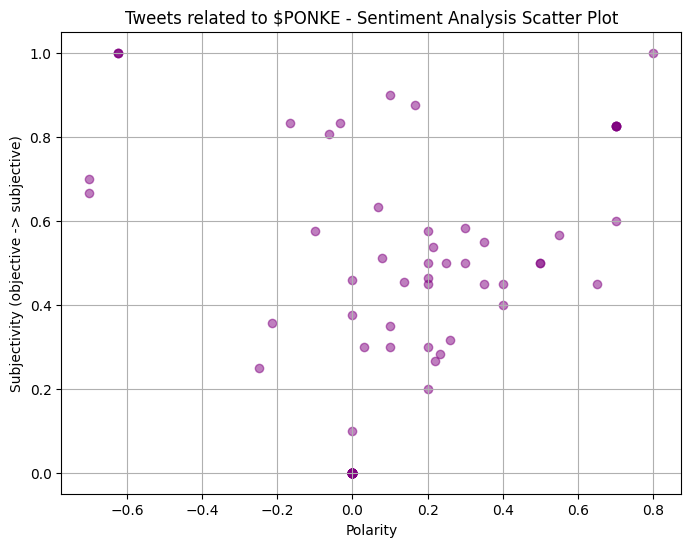

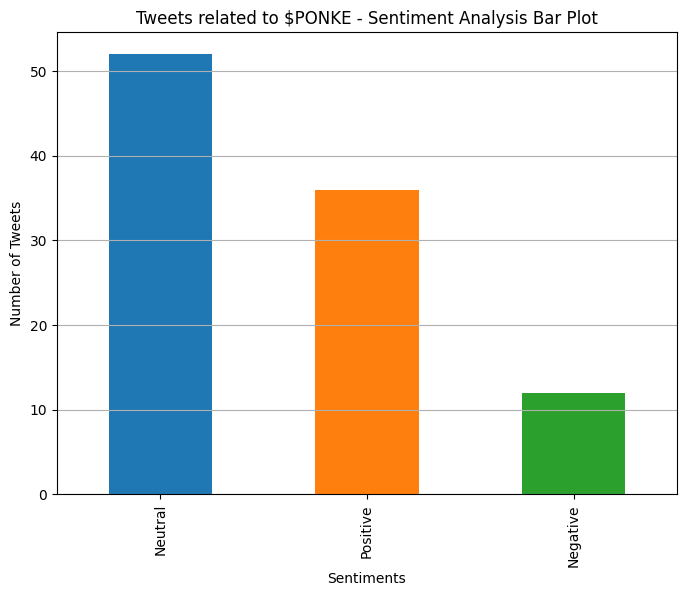

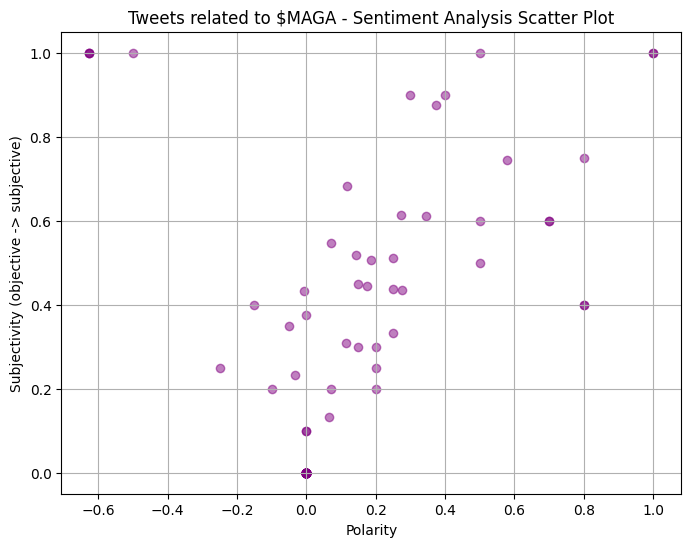

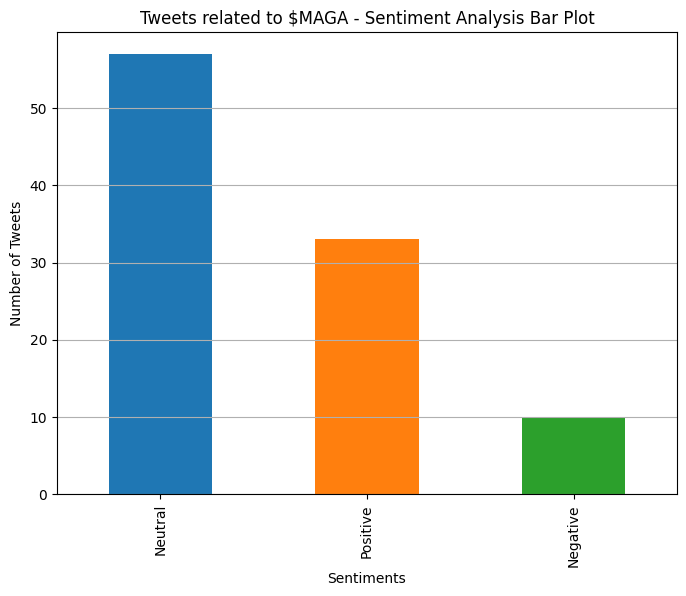

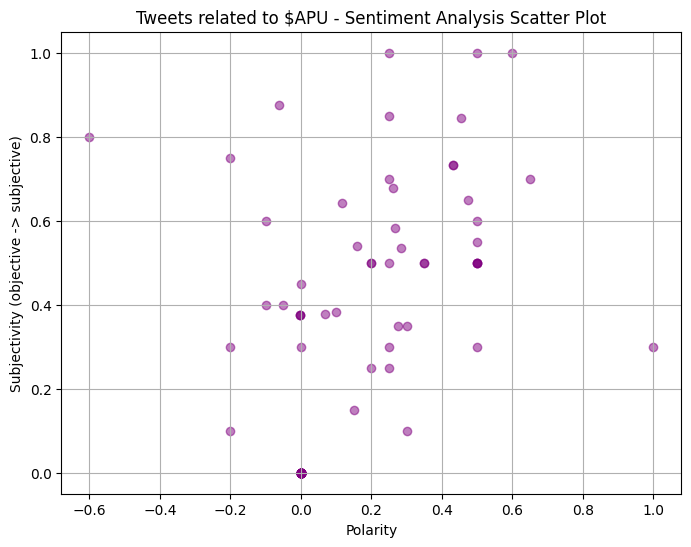

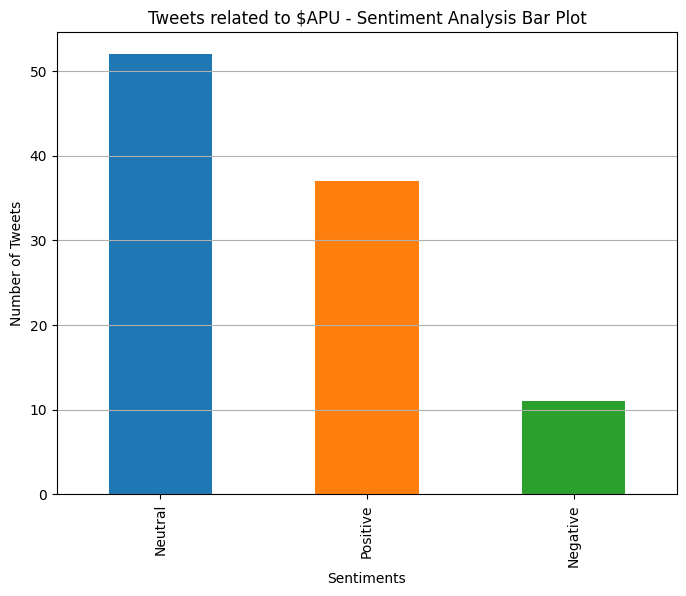

In [11]:
def clean_text(text):
    if isinstance(text, str):
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize text
        words = text.lower().split()
        return ' '.join(words)
    return ""

def calculate_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity  # Sentiment polarity
        subjectivity = blob.sentiment.subjectivity  # Sentiment subjectivity
        return pd.Series([polarity, subjectivity], index=['polarity', 'subjectivity'])
    return pd.Series([None, None], index=['polarity', 'subjectivity'])

def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

sheet_names = [
    'Tweets related to $PEPE ',
    'Tweets related to $WIF',
    'Tweets related to $FLOKI',
    'Tweets related to $BONK',
    'Tweets related to $PONKE',
    'Tweets related to $MAGA',
    'Tweets related to $APU'
]

for sheet in sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Clean the 'full_text' column
    df['cleaned_text'] = df['full_text'].apply(clean_text)

    # Calculate polarity and subjectivity
    df[['polarity', 'subjectivity']] = df['cleaned_text'].apply(calculate_sentiment)

    # Classify sentiment
    df['Sentiment'] = df['polarity'].apply(classify_sentiment)

    # Scatter plot for Polarity vs Subjectivity
    plt.figure(figsize=(8, 6))
    plt.scatter(df['polarity'], df['subjectivity'], color='purple', alpha=0.5)
    plt.title(f'{sheet} - Sentiment Analysis Scatter Plot')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity (objective -> subjective)')
    plt.grid(True)
    plt.show()

    # Bar plot for sentiment distribution
    plt.figure(figsize=(8, 6))
    df['Sentiment'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title(f'{sheet} - Sentiment Analysis Bar Plot')
    plt.xlabel('Sentiments')
    plt.ylabel('Number of Tweets')
    plt.grid(axis='y')
    plt.show()

In [14]:
for sheet in sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)
    # Clean the 'full_text' column
    df['cleaned_text'] = df['full_text'].apply(clean_text)
    # Calculate polarity and subjectivity
    df[['polarity', 'subjectivity']] = df['cleaned_text'].apply(calculate_sentiment)
    # Classify sentiment
    df['Sentiment'] = df['polarity'].apply(classify_sentiment)
    # Print sentiment counts for each sheet
    sentiment_counts = df['Sentiment'].value_counts()
    print(f"Sentiment counts for {sheet}:")
    print(sentiment_counts)
    print()  # Blank line for readability

Sentiment counts for Tweets related to $PEPE :
Sentiment
Positive    48
Neutral     44
Negative     8
Name: count, dtype: int64

Sentiment counts for Tweets related to $WIF:
Sentiment
Positive    61
Neutral     33
Negative     6
Name: count, dtype: int64

Sentiment counts for Tweets related to $FLOKI:
Sentiment
Positive    59
Neutral     30
Negative    11
Name: count, dtype: int64

Sentiment counts for Tweets related to $BONK:
Sentiment
Positive    68
Neutral     22
Negative    10
Name: count, dtype: int64

Sentiment counts for Tweets related to $PONKE:
Sentiment
Neutral     52
Positive    36
Negative    12
Name: count, dtype: int64

Sentiment counts for Tweets related to $MAGA:
Sentiment
Neutral     57
Positive    33
Negative    10
Name: count, dtype: int64

Sentiment counts for Tweets related to $APU:
Sentiment
Neutral     52
Positive    37
Negative    11
Name: count, dtype: int64



In [20]:
sheet_names = [
    'Tweets related to $PEPE ',
    'Tweets related to $WIF',
    'Tweets related to $FLOKI',
    'Tweets related to $BONK',
    'Tweets related to $PONKE',
    'Tweets related to $MAGA',
    'Tweets related to $APU'
]

for sheet in sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel("Dataset Memecoin Sentiment Analysis.xlsx", sheet_name=sheet)

    # Ensure only 100 tweets are considered
    df = df.head(100)  # Consider only the first 100 rows

    # Clean the 'full_text' column
    df['cleaned_text'] = df['full_text'].apply(clean_text)

    # Calculate subjectivity and polarity
    df[['polarity', 'subjectivity']] = df['cleaned_text'].apply(calculate_sentiment)

    # Count subjective and objective tweets
    subjective_count = df[df['subjectivity'] > 0.5].shape[0]
    objective_count = df[df['subjectivity'] <= 0.5].shape[0]

    # Print the counts
    print(f'{sheet} - Subjective tweets: {subjective_count}, Objective tweets: {objective_count}')

Tweets related to $PEPE  - Subjective tweets: 35, Objective tweets: 65
Tweets related to $WIF - Subjective tweets: 47, Objective tweets: 53
Tweets related to $FLOKI - Subjective tweets: 55, Objective tweets: 45


<ipython-input-20-74a6cd30ef83>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['full_text'].apply(clean_text)


Tweets related to $BONK - Subjective tweets: 55, Objective tweets: 45
Tweets related to $PONKE - Subjective tweets: 25, Objective tweets: 75
Tweets related to $MAGA - Subjective tweets: 22, Objective tweets: 78
Tweets related to $APU - Subjective tweets: 21, Objective tweets: 79
